# W1M1 - mtcars 데이터셋 분석하기

### 학습 목표
mtcars 데이터셋을 분석하고 그래프를 그리는 방법을 배웁니다.
- Jupyter notebook의 기본 사용법을 배웁니다.
- pandas의 DataFrame의 기본 사용법을 배웁니다.
- matplotlib로 그래프를 그리는 방법을 배웁니다.

### 사전지식
데이터셋의 features에 대한 설명은 다음과 같습니다.
- mpg = Miles/(US) gallon
- cyl = Number of cylinders
- disp = Displacement (cu.in.)
- hp = Gross horsepower
- drat = Rear axle ratio
- wt = Weight (lb/1000)
- qsec = ¼ mile time
- vs = V/S
- am = Transmission (0 = automatic, 1 = manual)
- gear = Number of forward gears
- carb = Number of carburetors

### 1. DataFrame methods을 사용해서 데이터셋의 결과를 출력하기

#### 1-1 head, tail

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# GitHub의 CSV 파일 URL
url = "https://raw.githubusercontent.com/softeerbootcamp4th/data_engineering_course_materials/main/missions/W1/mtcars.csv"

# CSV 파일 읽기
df = pd.read_csv(url)

# 데이터 확인 head, tail
print(df.head())    # 데이터 상위 5개를 직접 출력
print(df.tail())    # 데이터 하위 5개를 직접 출력

          Unnamed: 0   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2  
        Unnamed: 0   mpg  cyl   disp   hp  drat     wt  qsec  vs  am  gear  \
27    Lotus Europa  30.4    4   95.1  113  3.77  1.513  16.9   1   1     5   
28  Ford Pantera L  15.8    8  351.0  264  4.22  3.170  14.5   0   1     5   
29    Ferrari Dino  19.7    6  145.0  175  3.62  2.770  15.5   0   1     5   
30   Maserati Bora  15.0    8  301.0  335  3.54  3.570  14.6   0   1     5   
31      Volvo 142E  21.4    4  121.0  109  4.11  2.780  18.6   

#### 1-2 shape method를 이용해서 데이터의 갯수 (row count)를 출력하기

In [63]:
# 데이터프레임의 전체 크기 확인
print(df.shape)

# row 개수 출력
row_count = df.shape[0]
print(f"Row count: {row_count}")

# column 개수 출력
col_count = df.shape[1]
print(f"column count: {col_count}")

(32, 12)
Row count: 32
column count: 12


#### 1-3 데이터셋의 컬럼 중 이름이 없는 컬럼을 찾아서 적합한 이름으로 변경

In [75]:
# 칼럼 이름 확인
print(df.columns)

# 이름 없는 컬럼 찾기
unnamed_col = [col for col in df.columns if 'Unnamed' in col or col.strip() == '']
print(f"Unnamed columns: {unnamed_col}")

# 이름 변경
df.rename(columns = {'Unnamed: 0': 'Car Name'}, inplace=True)
print(df.columns)

Index(['Unnamed: 0', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')
Unnamed columns: ['Unnamed: 0']
Index(['Car Name', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs',
       'am', 'gear', 'carb'],
      dtype='object')


#### 1-4 info, dtypes, describe
Info(): 데이터프레임의 전체 요약 정보를 출력합니다.
describe(): 데이터프레임의 기술 통계 정보를 출력합니다.

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [66]:
print(df.dtypes)

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object


In [67]:
print(df.describe())

             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   0.978457   
min    10.400000   4.000000   71.100000   52.000000   2.760000   1.513000   
25%    15.425000   4.000000  120.825000   96.500000   3.080000   2.581250   
50%    19.200000   6.000000  196.300000  123.000000   3.695000   3.325000   
75%    22.800000   8.000000  326.000000  180.000000   3.920000   3.610000   
max    33.900000   8.000000  472.000000  335.000000   4.930000   5.424000   

            qsec         vs         am       gear     carb  
count  32.000000  32.000000  32.000000  32.000000  32.0000  
mean   17.848750   0.437500   0.406250   3.687500   2.8125  
std     1.786943   0.504016   0.498991   0.737804   1.6152  
min    14.500000   0.000000   0.000000   3.000000   1.0000  
2

---

### 2. gear, transmission features에는 각각 몇가지 값이 있는지를 출력하기

#### gear, transmission features에는 각각 몇가지 값이 있는지를 출력하기
- gear, transmission features에는 각각 몇가지 값이 있는지를 출력하세요.
- gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아내세요.
    - 먼저 결과값을 화면에 출력하세요.
    - 결과값을 바 그래프로 그리세요. 타이틀은 '# of Cars by Gear x Transmission'로, x축 레이블은 '(Gear, Auto Transmission)', y축 레이블은 '# of Cars'로 만드세요


#### gear x transmission 조합 구하기
gear와 transmission의 경우의 수 조합별로 나누고 각 조합에 몇개의 차량이 있는지를 알아낼 때 1)pandas.crosstab method를 사용하는 방법과 2)사용하지 않는 방법, 2가지 모두의 결과값을 각각 출력해야 합니다.

In [68]:
# gear 고유값 개수
gear_count = df['gear'].nunique()
print(gear_count)
# .unique를 활용하여 고유 값 자체를 배열로 볼 수도 있음

# transmission 고유값 개수
trans_count = df['am'].nunique()
print(trans_count)

3
2


In [69]:
# 고유값과 개수 출력
print(df['gear'].value_counts())
print(df['am'].value_counts())

gear
3    15
4    12
5     5
Name: count, dtype: int64
am
0    19
1    13
Name: count, dtype: int64


#### cross tab 사용

In [70]:
gear_am_crosstab = pd.crosstab(df['gear'], df['am'])
print(gear_am_crosstab)

am     0  1
gear       
3     15  0
4      4  8
5      0  5


#### Cross tab 미사용

In [71]:
#gear_am_grouped = df.groupby(['gear', 'am']).size().unstack(fill_value=0)
gear_am_grouped = df.groupby(['gear', 'am']).size().reset_index(name='count')
print(gear_am_grouped)

   gear  am  count
0     3   0     15
1     4   0      4
2     4   1      8
3     5   1      5


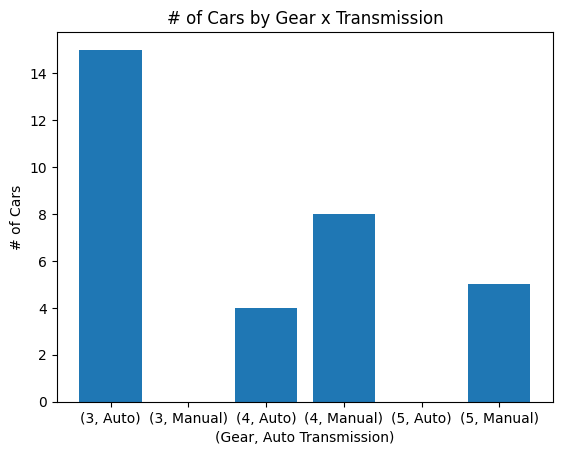

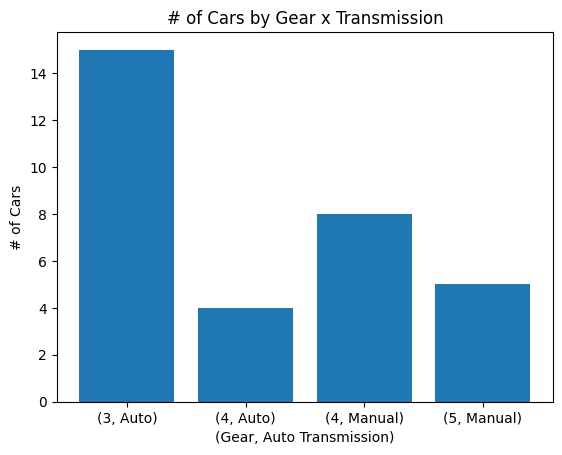

In [72]:
import matplotlib.pyplot as plt

# 막대그래프 그리기

# Crosstab 결과를 긴 형식으로 변환
crosstab_long = gear_am_crosstab.stack().reset_index()
crosstab_long.columns = ['Gear', 'Transmission', 'Count']
crosstab_long['Transmission'] = crosstab_long['Transmission'].map({0: 'Auto', 1: 'Manual'})

# Bar Plot
plt.bar(
    x=[f"({row.Gear}, {row.Transmission})" for row in crosstab_long.itertuples()],
    height=crosstab_long['Count'],
)
plt.title('# of Cars by Gear x Transmission')  # 그래프 제목
plt.xlabel('(Gear, Auto Transmission)')  # x축 레이블
plt.ylabel('# of Cars')  # y축 레이블
plt.show()

# Bar Plot
gear_am_grouped['Transmission'] = gear_am_grouped['am'].map({0: 'Auto', 1: 'Manual'})
plt.bar(
    x=[f"({row.gear}, {row.Transmission})" for row in gear_am_grouped.itertuples()],
    height=gear_am_grouped['count'],
)
plt.title("# of Cars by Gear x Transmission")
plt.xlabel("(Gear, Auto Transmission)")
plt.ylabel("# of Cars")
plt.show()

---

### 3. 데이터셋에 포함된 모든 features의 히스토그램을 그리기

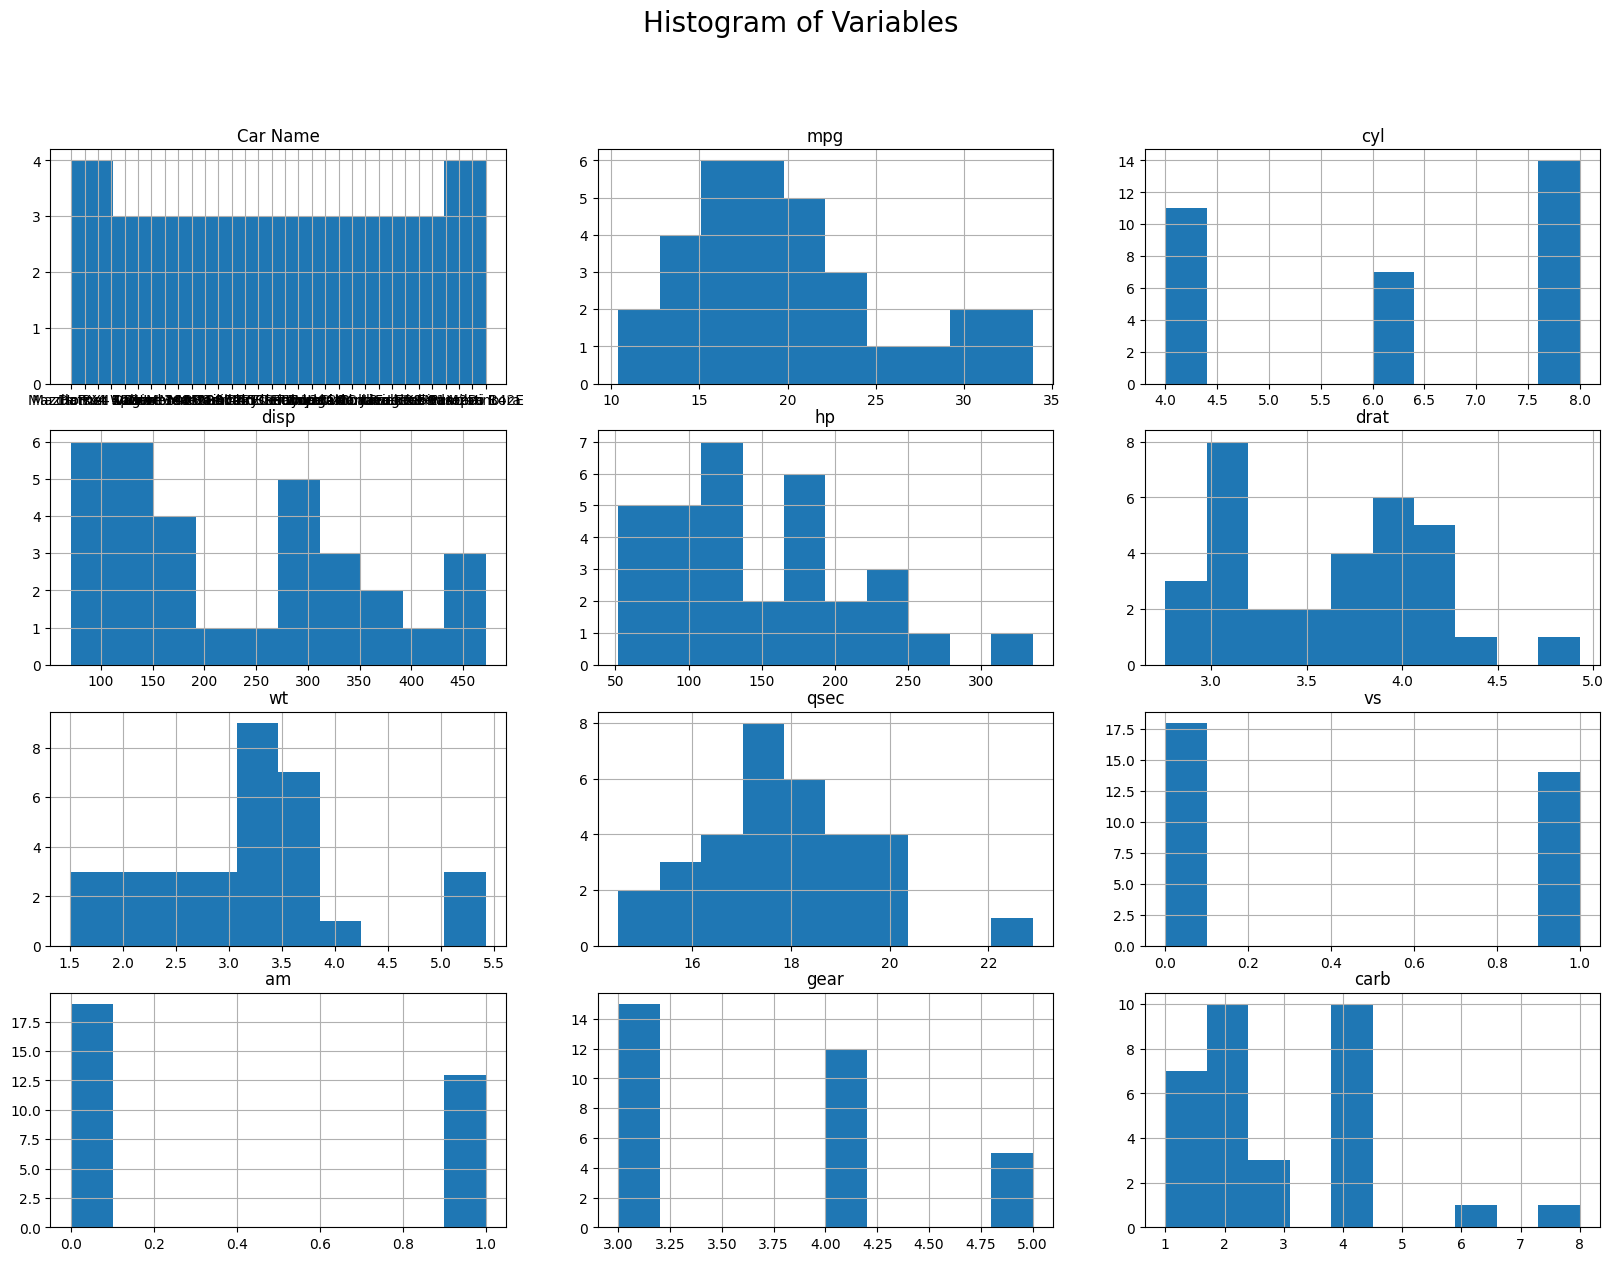

In [ ]:
plt.figure(figsize=(20, 14))
show_columns = [col for col in df.columns if col != 'Car name']
plt.suptitle('Histogram of Variables', fontsize=20)
for i, col in enumerate(show_columns):
    plt.subplot(4, 3, i+1)
    df[col].hist()
    plt.title(col)